# Práctica 4: Regresión Polinomial
***
Rodriguez Nuñez Diego Eduardo

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


## Programa 1

1. Para este programa se utilizará el dataset <i>datos.csv</i>
2. Divide <i>datos.csv</i> en 70% para entrenamiento y 30% para pruebas, con los parámetros shuffle=True y random_state=0
3. Con las bibliotecas de scikit-learn realiza las siguientes regresiones:
    * Regresión lineal con OLS
    * Regresión polinomial de grado 2 con OLS
    * Regresión polinomial de grado 3 con OLS
    * Regresión lineal con SGD
    * Regresión polinomial de grado 2 con SGD
    * Regresión polinomial de grado 3 con SGD
4. Entrada 
    * <i>datos.csv</i>, para SGD: número de iteraciones y alpha
5. Salida
    * Una gráfica para cada regresión con los siguientes elementos:
        * Distribución de datos de prueba
        * (X_test,y_pred) //En el caso de regresión polinomial ordenar los datos antes de pintar la curva predicha
    * Resumen de los resultados
6. Bibliotecas de scikit-learn
    * from sklearn.linear_model import LinearRegression
    * from sklearn.linear_model import SGDRegressor
    * from sklearn.preprocessing import PolynomialFeatures
    * from sklearn.metrics import mean_squared_error, r2_score
    * import operator

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

In [3]:
def Resumen(x_test, y_test,regresion):
    prediction = regresion.predict(x_test)
    mse = mean_squared_error(y_test, prediction)
    r2 = r2_score(y_test, prediction)
    return mse, r2

def Grafica_Regresion(x_test,y_test,y_pred,title):
    plt.scatter(x_test, y_test, color='blue',label='Datos de prueba')
    plt.plot(x_test, y_pred, color='red', label='Predicción')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

def RegresionOLS(x_train,y_train,x_test,y_test):
    regresionL = LinearRegression()
    regresionL.fit(x_train.reshape(-1,1), y_train)
    regresionL_OLSmse, regresionL_OLSr2 = Resumen(x_test.reshape(-1,1), y_test,regresionL)
    print(f'Regresion Lineal con OLS: \t mse={regresionL_OLSmse} \t r2={regresionL_OLSr2}')
    y_pred = regresionL.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con OLS')

    for grado in range(2,4):
        regresionL_OLSpoly = make_pipeline(PolynomialFeatures(degree=grado), LinearRegression())
        regresionL_OLSpoly.fit(x_train.reshape(-1,1), y_train)
        regresionL_OLSpolymse, regresionL_OLSpolyr2 = Resumen(x_test.reshape(-1,1), y_test,regresionL_OLSpoly)
        print(f'Regresion Polinomial con OLS grado {grado}: \t mse={regresionL_OLSpolymse} \t r2={regresionL_OLSpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionL_OLSpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con OLS de grado {grado}')

def RegresionSGD(x_train,y_train,x_test,y_test,alpha,iterations):
    regresionSGD = SGDRegressor(learning_rate='constant',eta0=alpha, max_iter=iterations)
    regresionSGD.fit(x_train.reshape(-1,1), y_train)
    regresionSGDmse, regresionSGDr2 = Resumen(x_test.reshape(-1,1), y_test,regresionSGD)
    print(f'Regresion Lineal con SGD: \t mse={regresionSGDmse} \t r2={regresionSGDr2}')
    y_pred = regresionSGD.predict(x_test.reshape(-1,1))
    Grafica_Regresion(x_test,y_test,y_pred,'Regresion Lineal con SGD')

    for grado in range(2,4):
        regresionSGDpoly = make_pipeline(PolynomialFeatures(degree=grado), SGDRegressor(learning_rate='constant',eta0=alpha, max_iter=iterations))
        regresionSGDpoly.fit(x_train.reshape(-1,1), y_train)
        regresionSGDpolymse, regresionSGDpolyr2 = Resumen(x_test.reshape(-1,1), y_test,regresionSGDpoly)
        print(f'Regresion Polinomial con SGD grado {grado}: \t mse={regresionSGDpolymse} \t r2={regresionSGDpolyr2}')
        indices = np.argsort(x_test)
        y_pred = regresionSGDpoly.predict(x_test[indices].reshape(-1,1))
        Grafica_Regresion(x_test[indices],y_test[indices],y_pred,f'Regresion Polinomial con SGD de grado {grado}')

In [4]:
data = pd.read_csv('datos.csv')
data

,x,y
0,-3.292157,-44.608971
1,-0.936214,0.623178
2,-3.602674,-58.873048
3,-0.850265,-6.057589
4,2.309657,-3.967128
...,...,...
95,5.878571,36.139165
96,2.117848,-8.607422
97,0.430170,-3.414761
98,-0.315372,-1.059461


In [5]:
x = data['x'].values
y = data['y'].values
x,y

(array([-3.29215704, -0.93621395, -3.60267397, -0.85026525,  2.30965656,
         1.56786929, -0.28311318,  0.6684103 , -2.48223722,  1.0607969 ,
         9.65896945, -0.5933086 , -4.80926387,  1.86272445, -2.59833764,
         1.53515772,  4.66335724,  3.04373645, -1.69087204,  3.16198045,
         5.1456589 ,  7.11881057,  3.52895655,  5.75838608,  6.84169354,
         4.68639968,  3.53241541,  2.08454669,  1.80044833,  3.90296628,
         4.01738134,  4.43943885,  1.46772157,  6.89059504,  4.72189509,
        -0.18727169, -1.41820205,  0.79297508,  4.61239145,  2.9346576 ,
         5.49544952,  0.60301268, -2.46475658, -1.53633871,  5.21225786,
         3.20953084,  1.37517507,  0.93090081,  1.96849994,  1.61926372,
        -3.64945209,  5.811455  ,  5.51937022,  3.24085694, -3.76882608,
        -3.60267688,  4.58367706,  2.80401011, -0.8417559 ,  0.15776189,
         0.87072341,  1.10528548,  4.08370358,  3.30546066, -0.01688427,
         4.30974822,  4.02299798,  3.90753824,  0.2

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)    

Regresion Lineal con OLS: 	 mse=296.0945867766399 	 r2=0.7198048208163852


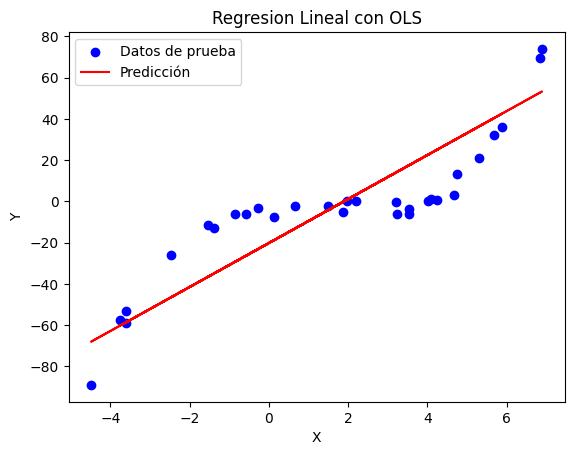

Regresion Polinomial con OLS grado 2: 	 mse=352.43738401011177 	 r2=0.6664874659184123


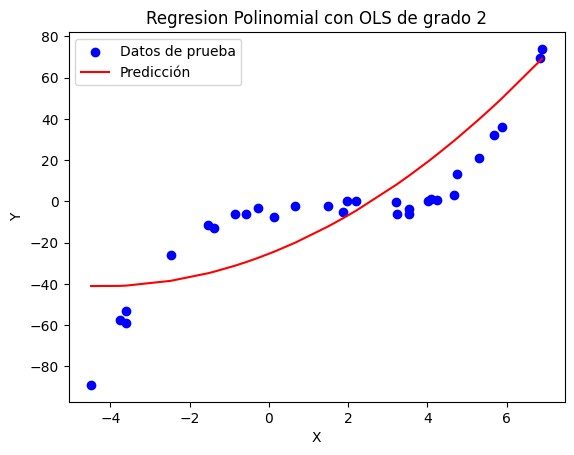

Regresion Polinomial con OLS grado 3: 	 mse=8.487854131822635 	 r2=0.9919679186464004


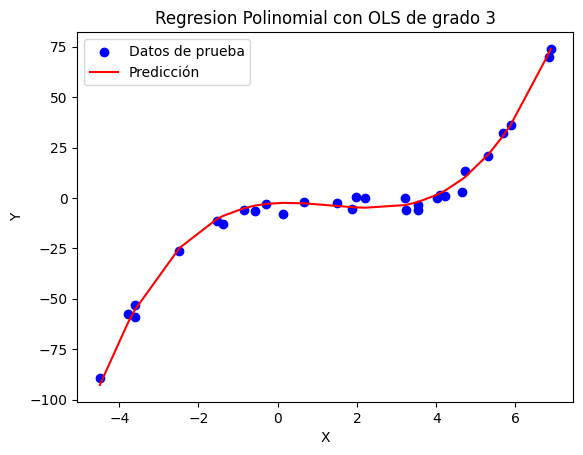

In [7]:
RegresionOLS(x_train,y_train,x_test,y_test)

Regresion Lineal con SGD: 	 mse=554.9633654308457 	 r2=0.47483653345362153


c:\Users\dern9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


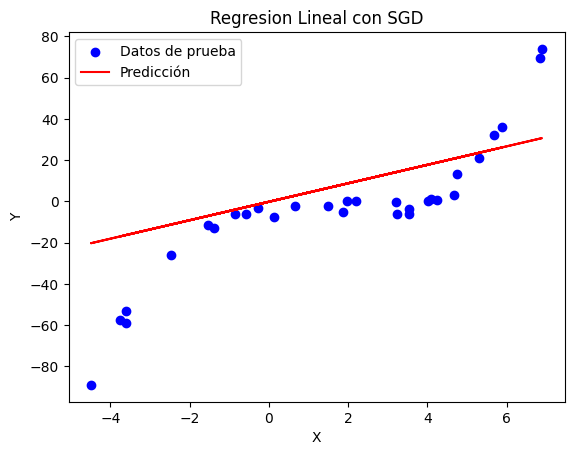

c:\Users\dern9\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Regresion Polinomial con SGD grado 2: 	 mse=872.4796833766072 	 r2=0.17436990699804744


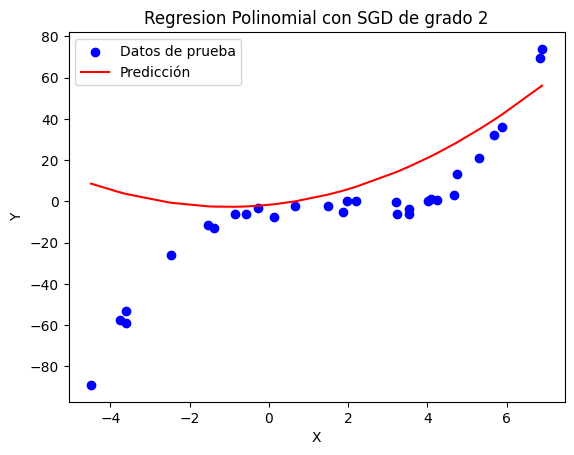

Regresion Polinomial con SGD grado 3: 	 mse=15.761373908225188 	 r2=0.9850849654683943


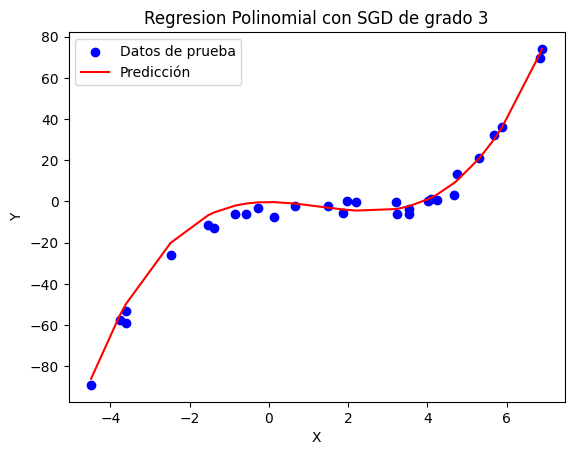

In [8]:
RegresionSGD(x_train,y_train,x_test,y_test,0.0000001,10000)

## Programa 2

1. Para este programa se utilizará el dataset <i>cal_housing.csv</i>. Las primeras columnas son las características y la última ccolumna el target
2. Divide <i>datos.csv</i> en 80% para entrenamiento y 20% para pruebas, con los parámetros shuffle=True y random_state=0
3. Con las bibliotecas de scikit-learn realiza las siguientes regresiones con OLS:
    * Lineal
    * Polinomial de grado 2
    * Polinomial de grado 2 con escalamiento estándar
    * Polinomial de grado 2 con escalamiento robusto
    * Polinomial de grado 3
    * Polinomial de grado 3 con escalamiento estándar
    * Polinomial de grado 3 con escalamiento robusto
4. Entrada 
    * Archivo <i>cal_housing.csv</i>
5. Salida
    * Resumen de los resultados
6. Bibliotecas de scikit-learn
    * from sklearn import preprocessing


In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [10]:
data2 = pd.read_csv('cal_housing.csv')
data2

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [11]:
x2 = data2.drop('medianHouseValue', axis=1).values
y2 = data2['medianHouseValue'].values

In [12]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=0, shuffle=True)

In [13]:
def TransformaryEscalar(x,grado,escalador):
    x_transformado = x.copy()
    if grado > 1:
        poly = PolynomialFeatures(degree=grado)
        x_transformado = poly.fit_transform(x_transformado)
        if escalador:
            x_transformado = escalador.fit_transform(x_transformado)
    else:
        x_transformado = escalador.fit_transform(x_transformado)
    return x_transformado

In [14]:
mses = []
r2s = []

### Regresión Lineal

In [15]:
model = LinearRegression()
model.fit(x_train2, y_train2)
y_pred = model.predict(x_test2)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Lineal: \t mse={mse} \t r2={r2}')

Regresion Lineal: 	 mse=4853781771.947968 	 r2=0.6277645980446449


### Polinomial de grado 2

In [16]:
grado = 2
escalador = None
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado}: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 2: 	 mse=4076152893.137456 	 r2=0.6874007769822805


### Polinomial de grado 2 con escalamiento estándar

In [17]:
grado = 2
escalador = StandardScaler()
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado} con StandardScaler: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 2 con StandardScaler: 	 mse=4111950340.7116804 	 r2=0.684655479003748


### Polinomial de grado 2 con escalamiento robusto

In [18]:
grado = 2
escalador = RobustScaler()
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado} con RobustScaler: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 2 con RobustScaler: 	 mse=5047513814.436799 	 r2=0.6129073324946694


### Polinomial de grado 3

In [19]:
grado = 3
escalador = None
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado}: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 3: 	 mse=4132686390.1888638 	 r2=0.6830652361632653


### Polinomial de grado 3 con escalamiento estándar

In [20]:
grado = 3
escalador = StandardScaler()
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado} con StandardScaler: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 3 con StandardScaler: 	 mse=8862039818.061186 	 r2=0.320372215148751


### Polinomial de grado 3 con escalamiento robusto

In [21]:
grado = 3
escalador = RobustScaler()
x_train_poly = TransformaryEscalar(x_train2,grado,escalador)
x_test_poly = TransformaryEscalar(x_test2,grado,escalador)
model = LinearRegression()
model.fit(x_train_poly, y_train2)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test2, y_pred)
r2 = r2_score(y_test2, y_pred)
mses.append(mse)
r2s.append(r2)
print(f'Regresion Polinomial grado {grado} con RobustScaler: \t mse={mse} \t r2={r2}')

Regresion Polinomial grado 3 con RobustScaler: 	 mse=8684145318047.662 	 r2=-664.9850967722573


In [22]:
data3 = {'MSE': mses, 'R2': r2s}
df = pd.DataFrame(data3)
df.index = ['Lineal','Polinomial 2','Polinomial 2 StandardScaler','Polinomial 2 RobustScaler','Polinomial 3','Polinomial 3 StandardScaler','Polinomial 3 RobustScaler']
df

,MSE,R2
Lineal,4.853782e+09,0.627765
Polinomial 2,4.076153e+09,0.687401
Polinomial 2 StandardScaler,4.111950e+09,0.684655
Polinomial 2 RobustScaler,5.047514e+09,0.612907
Polinomial 3,4.132686e+09,0.683065
Polinomial 3 StandardScaler,8.862040e+09,0.320372
Polinomial 3 RobustScaler,8.684145e+12,-664.985097
